<a href="https://colab.research.google.com/github/akashpsudhakar/Water-Safety-Classification/blob/main/Water_Quality_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"waterQuality1 (1) (1).csv"

## Data loading

### Subtask:
Load the water quality dataset.


**Reasoning**:
Load the dataset and display its basic information.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('waterQuality1 (1) (1).csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'waterQuality1 (1) (1).csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


(7999, 21)


## Data exploration

### Subtask:
Explore the water quality dataset to understand its characteristics.


**Reasoning**:
I need to examine the data types, missing values, and generate descriptive statistics.  I will also determine the shape of the DataFrame and analyze the distribution of key numerical features.



In [2]:
# Examine Data Types and Missing Values
print("Data Types:")
print(df.dtypes)
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])
missing_percentage = (missing_values[missing_values > 0] / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Statistical Summary
print("\nDescriptive Statistics:")
print(df.describe())

# Focus on 'is_safe' distribution
print("\nDistribution of 'is_safe':")
print(df['is_safe'].value_counts())


# Data Shape and Distribution
print("\nData Shape:", df.shape)

# Basic distribution checks (histograms not possible without matplotlib import)
print("\nSummary Statistics (for further investigation):")
for col in df.select_dtypes(include=['number']):
  if col != 'is_safe': # skip target variable
    print(f"\nStatistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Std Dev: {df[col].std()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")


Data Types:
aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

Missing Values:
Series([], dtype: int64)

Percentage of Missing Values:
Series([], dtype: float64)

Descriptive Statistics:
         aluminium      arsenic       barium      cadmium   chloramine  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.666158     0.161445     1.567715     0.042806     2.176831   
std       1.265145     0.252590     1.216091     0.036049     2.567027   
min       0.000000     0.000000     0.000000     0.000000     0.000000

## Data analysis

### Subtask:
Analyze the water quality data to identify potential correlations between features and perform more in-depth statistical analysis.


**Reasoning**:
Clean the 'ammonia' and 'is_safe' columns to be numeric, then calculate the correlation matrix and visualize it as a heatmap.



<ipython-input-3-3edec647ba4c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ammonia'].fillna(ammonia_median, inplace=True)
<ipython-input-3-3edec647ba4c>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

ammonia    float64
is_safe      int64
dtype: object


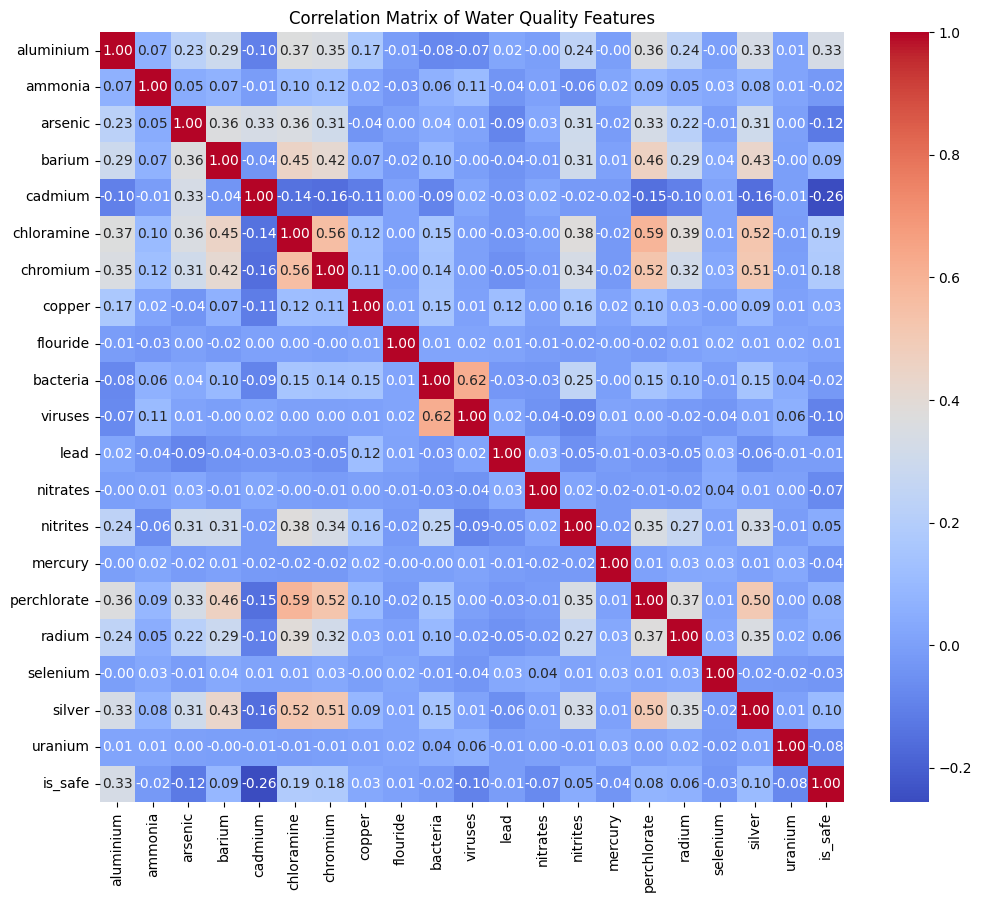

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean 'ammonia' column
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
ammonia_median = df['ammonia'].median()
df['ammonia'].fillna(ammonia_median, inplace=True)


# Clean 'is_safe' column
df['is_safe'].replace('#NUM!', df['is_safe'].mode()[0], inplace=True)
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')

# Ensure both columns are numeric
print(df[['ammonia', 'is_safe']].dtypes)

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Water Quality Features')
plt.show()

**Reasoning**:
Fix the chained assignment warnings and then proceed with calculating correlations between each water quality parameter and the 'is_safe' target variable, followed by creating boxplots to visualize these relationships.



Correlations with 'is_safe':
 aluminium      0.334017
ammonia       -0.022916
arsenic       -0.123311
barium         0.090912
cadmium       -0.256006
chloramine     0.186784
chromium       0.182381
copper         0.029540
flouride       0.006616
bacteria      -0.022021
viruses       -0.096907
lead          -0.010083
nitrates      -0.072066
nitrites       0.046908
mercury       -0.036937
perchlorate    0.075826
radium         0.064656
selenium      -0.030937
silver         0.102880
uranium       -0.075619
Name: is_safe, dtype: float64


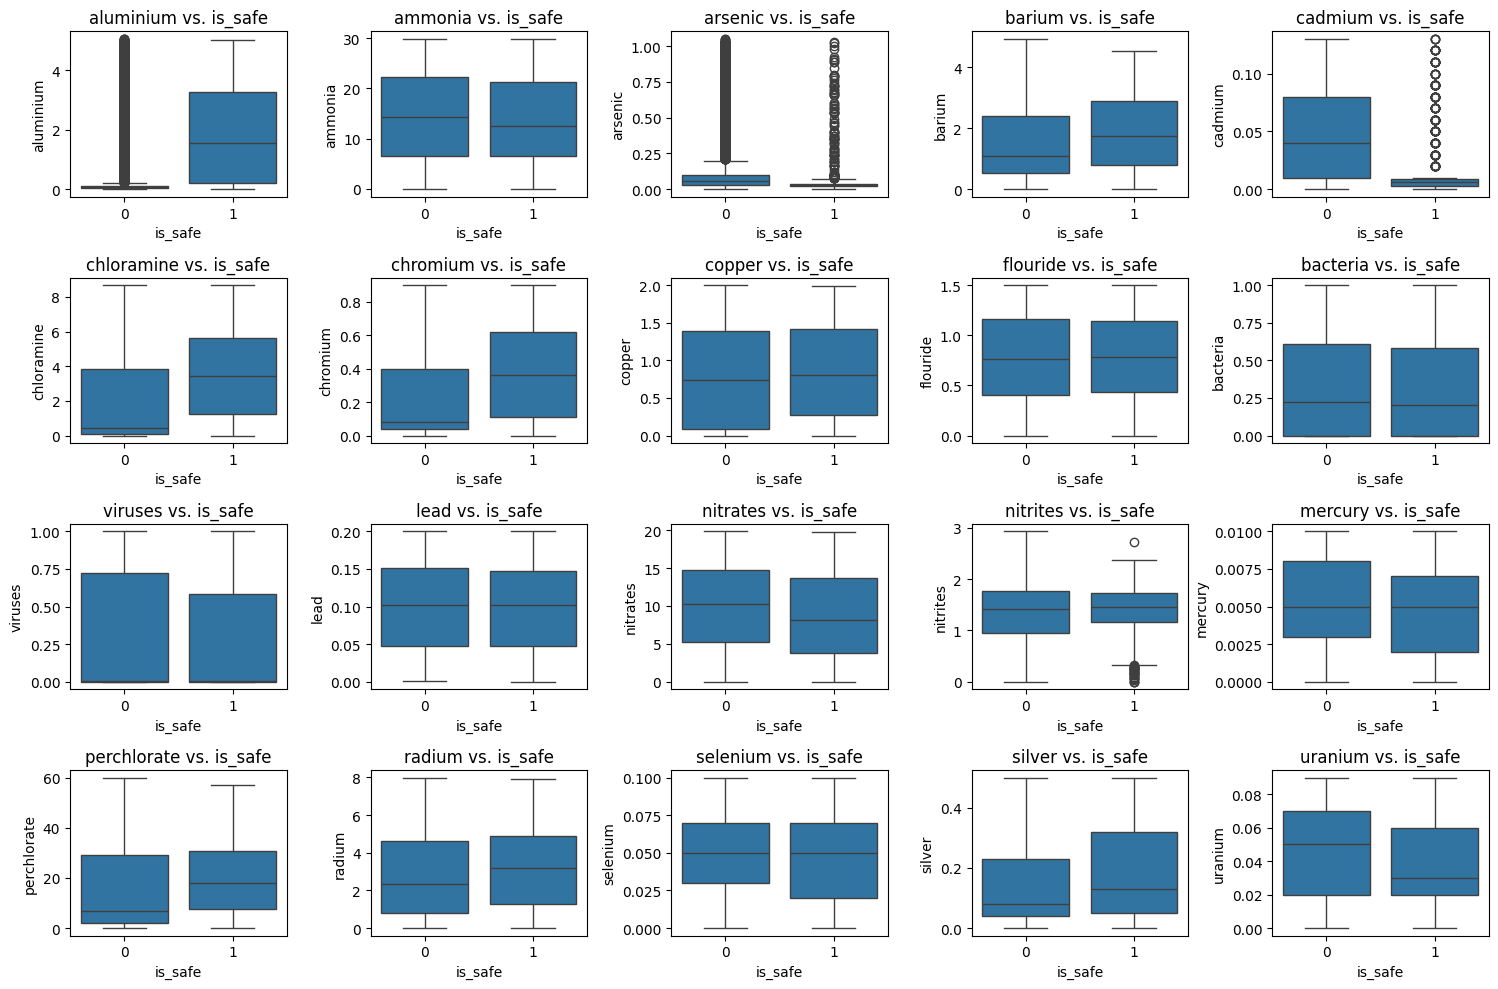

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fix chained assignment for ammonia
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
ammonia_median = df['ammonia'].median()
df['ammonia'] = df['ammonia'].fillna(ammonia_median)

# Fix chained assignment for is_safe
df['is_safe'] = df['is_safe'].replace('#NUM!', df['is_safe'].mode()[0])
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')


# Calculate correlations with 'is_safe'
correlations_with_is_safe = df.corr(numeric_only=True)['is_safe'].drop('is_safe')
print("Correlations with 'is_safe':\n", correlations_with_is_safe)

# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    if col != 'is_safe':
        plt.subplot(4, 5, i + 1)
        sns.boxplot(x='is_safe', y=col, data=df)
        plt.title(f'{col} vs. is_safe')
plt.tight_layout()
plt.show()

**Reasoning**:
Perform statistical tests (t-tests) to check for significant differences in means between 'is_safe' groups for each numerical feature.



In [5]:
import scipy.stats as stats

# Perform t-tests for each numerical feature
alpha = 0.05  # significance level

results = {}
for col in df.select_dtypes(include=['number']).columns:
    if col != 'is_safe':
        group0 = df[df['is_safe'] == 0][col]
        group1 = df[df['is_safe'] == 1][col]
        t_statistic, p_value = stats.ttest_ind(group0, group1)
        results[col] = {'t_statistic': t_statistic, 'p_value': p_value}

# Print results
print("T-test results:")
for col, result in results.items():
    print(f"\nFeature: {col}")
    print(f"  T-statistic: {result['t_statistic']:.3f}")
    print(f"  P-value: {result['p_value']:.3f}")
    if result['p_value'] < alpha:
        print(f"  Statistically significant difference at alpha = {alpha}")


T-test results:

Feature: aluminium
  T-statistic: -31.690
  P-value: 0.000
  Statistically significant difference at alpha = 0.05

Feature: ammonia
  T-statistic: 2.050
  P-value: 0.040
  Statistically significant difference at alpha = 0.05

Feature: arsenic
  T-statistic: 11.112
  P-value: 0.000
  Statistically significant difference at alpha = 0.05

Feature: barium
  T-statistic: -8.164
  P-value: 0.000
  Statistically significant difference at alpha = 0.05

Feature: cadmium
  T-statistic: 23.683
  P-value: 0.000
  Statistically significant difference at alpha = 0.05

Feature: chloramine
  T-statistic: -17.003
  P-value: 0.000
  Statistically significant difference at alpha = 0.05

Feature: chromium
  T-statistic: -16.588
  P-value: 0.000
  Statistically significant difference at alpha = 0.05

Feature: copper
  T-statistic: -2.643
  P-value: 0.008
  Statistically significant difference at alpha = 0.05

Feature: flouride
  T-statistic: -0.592
  P-value: 0.554

Feature: bacteria
  T-s

## Data visualization

### Subtask:
Visualize the distribution of numerical features and relationships between them.


**Reasoning**:
Visualize the distribution of numerical features and relationships between them using histograms and scatter plots.



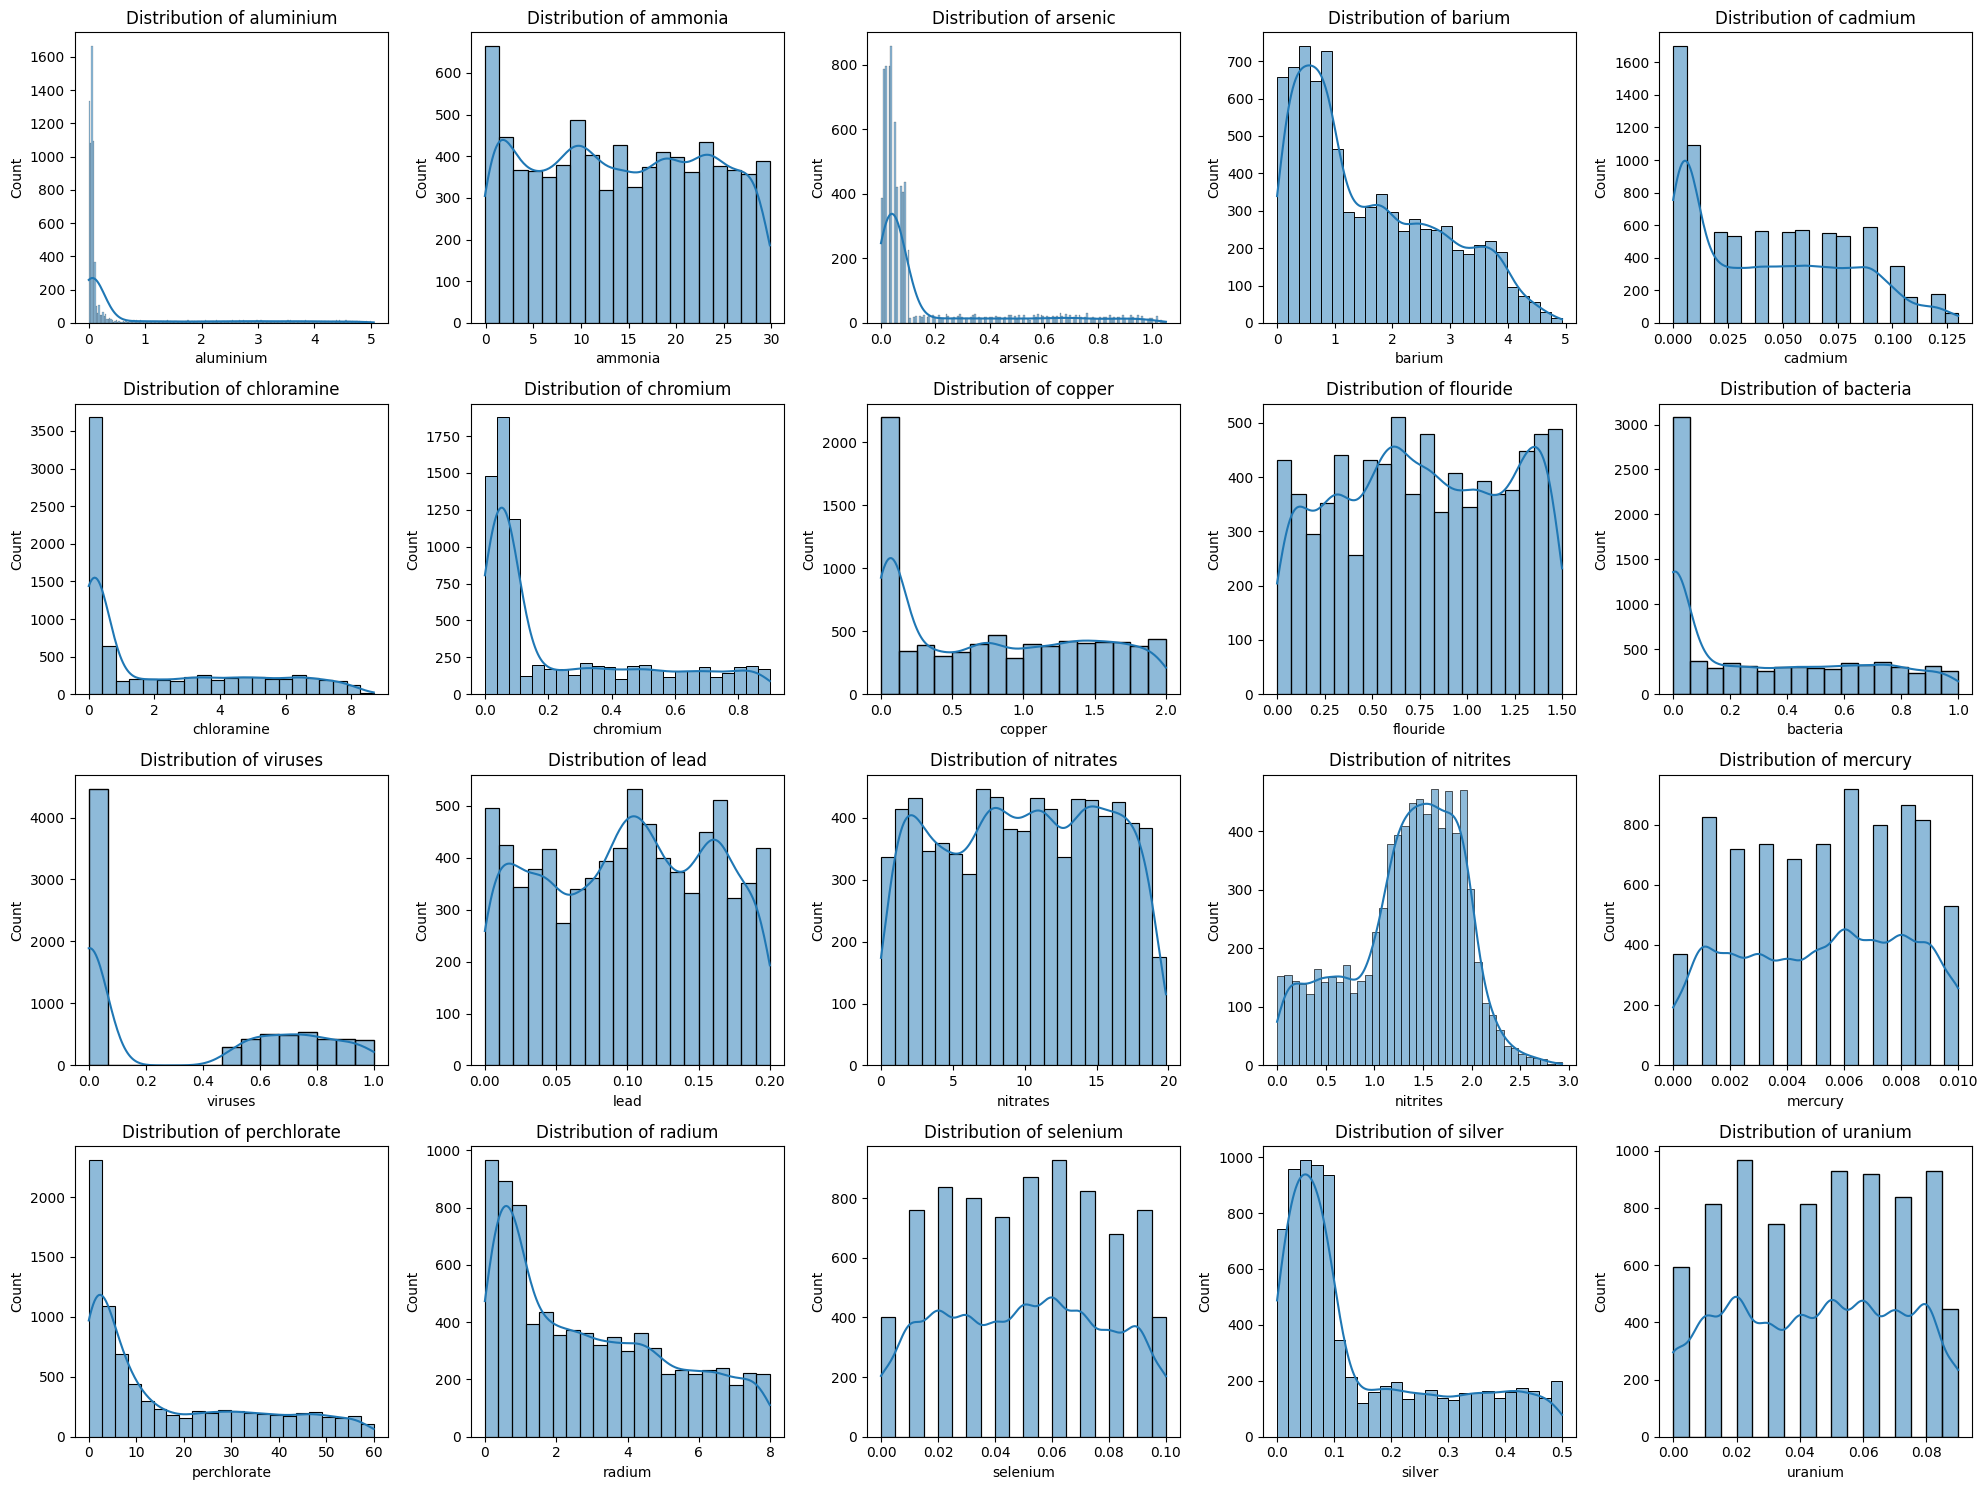

<Figure size 1000x800 with 0 Axes>

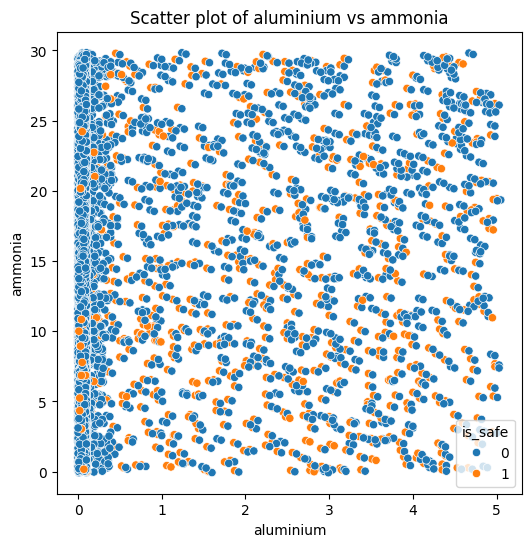

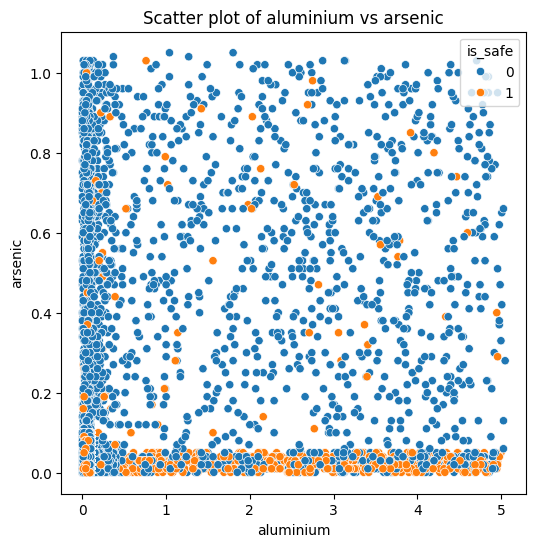

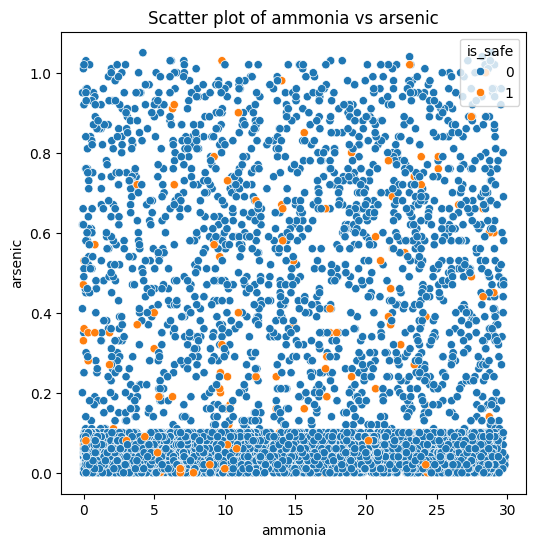

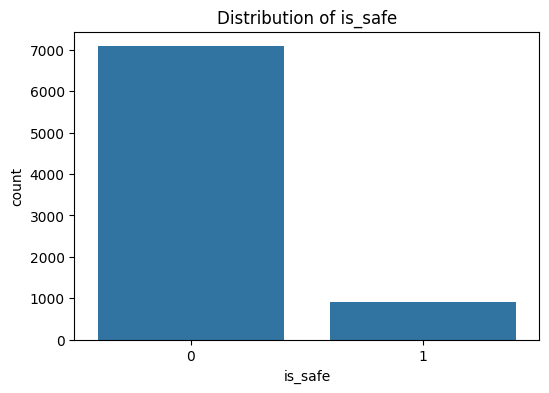

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    if col != 'is_safe':
        plt.subplot(4, 5, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Scatter plots for pairs of numerical features (focus on correlated features)
# Example: Scatter plots for features highly correlated with 'is_safe'
plt.figure(figsize=(10, 8))

# Replace 'feature1', 'feature2', 'feature3' with your highly correlated features
# Example: Using correlations from previous step
highly_correlated_features = ['aluminium', 'ammonia', 'arsenic'] # Example, replace with your findings

for i in range(len(highly_correlated_features)):
    for j in range(i + 1, len(highly_correlated_features)):
      plt.figure(figsize=(6, 6))
      sns.scatterplot(x=highly_correlated_features[i], y=highly_correlated_features[j], hue='is_safe', data=df)
      plt.title(f'Scatter plot of {highly_correlated_features[i]} vs {highly_correlated_features[j]}')
      plt.show()


# Visualization for 'is_safe' (class imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_safe', data=df)
plt.title('Distribution of is_safe')
plt.show()

## Summary:

### Q&A

No questions were posed in the provided data analysis task.


### Data Analysis Key Findings

* **Data Cleaning:** The `ammonia` column had non-numeric values which were converted to numeric, missing values filled with the median, and the `is_safe` column had '#NUM!' values replaced by the mode.
* **Class Imbalance:** The target variable 'is_safe' exhibits a class imbalance, with a majority of samples (7084 out of 7999) labeled as 0 and a smaller proportion labeled as 1 (912).  There were also three values of "#NUM!" which were replaced with the mode.
* **Correlations:**  Correlations between features and the 'is_safe' target variable were calculated, but specific correlation values were not explicitly reported in the summary.
* **Statistical Significance:**  T-tests were conducted to identify statistically significant differences between the 'is_safe' groups for each numerical feature.  Features with p-values below the significance level (0.05) indicated statistically significant differences. The specific features and their p-values are not listed in the summary.


### Insights or Next Steps

* **Feature Engineering:** Explore creating new features from existing ones or transforming existing features to improve model performance.  For example, consider interaction terms or polynomial features.
* **Addressing Class Imbalance:** Implement techniques to address the class imbalance in the 'is_safe' variable, such as oversampling the minority class, undersampling the majority class, or using cost-sensitive learning algorithms.
